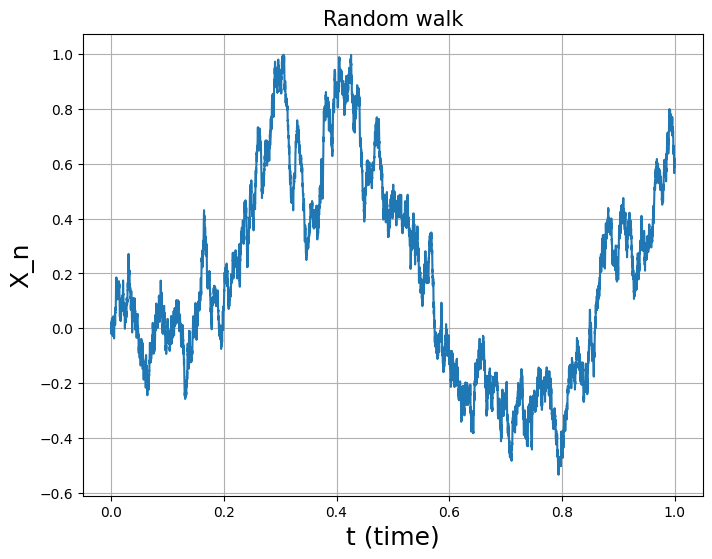

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


N = 10000 # number of steps
h = 1/N #time steps
D = 1 #diffusion coefficient
mean = 0
std = math.sqrt(2*D*h)

def random_walk(N):
    random_increments = np.random.normal(mean,std, N)
    random_walk = np.cumsum(random_increments)
    return random_walk
  
X = random_walk(N)

T = np.arange(0,N*h,step=h)

plt.figure(figsize=(8,6))
plt.grid(True)
plt.plot(T,X) 
plt.title("Random walk", fontsize=15)
plt.xlabel('t (time)', fontsize=18)
plt.ylabel('X_n', fontsize=18)
plt.show()

In [2]:
num_simulations = 50000 # num of simulation

X_norm = [0] * num_simulations 
X_norm_0_5 = [0] * num_simulations 
X_norm_0_1 = [0] * num_simulations 
X_arr = []

for i in range(num_simulations):
    X = random_walk(N)
    X_arr.append(X)
    X_norm[i] = X[N - 1] 
    X_norm_0_5[i] = X[5000-1]
    X_norm_0_1[i] = X[1000-1]

print('The mean is: {0}'.format(np.mean(X_norm)))
print('The var is: {0}'.format(np.var(X_norm)))

The mean is: -0.011852792767431793
The var is: 2.0092853436061398


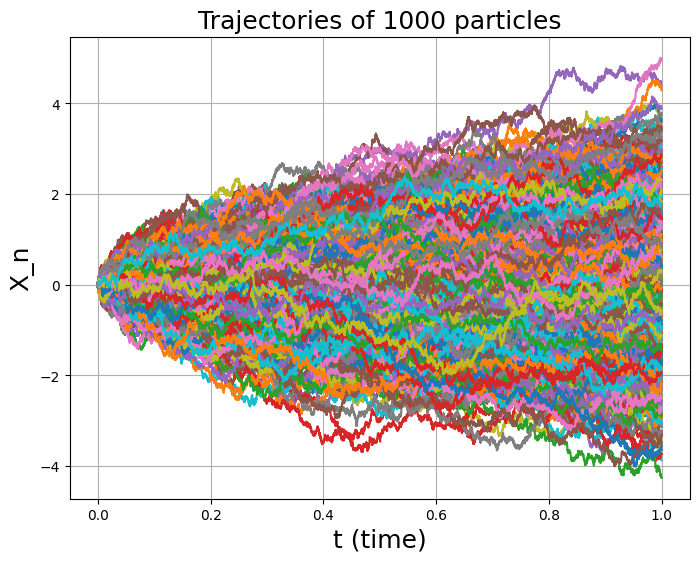

In [3]:
plt.figure(figsize=(8,6))
plt.grid(True)
plt.title('Trajectories of 1000 particles', fontsize=18)
plt.xlabel('t (time)', fontsize=18)
plt.ylabel('X_n', fontsize=18)
for i in range(1000):
    plt.plot(T, X_arr[i])
plt.show()

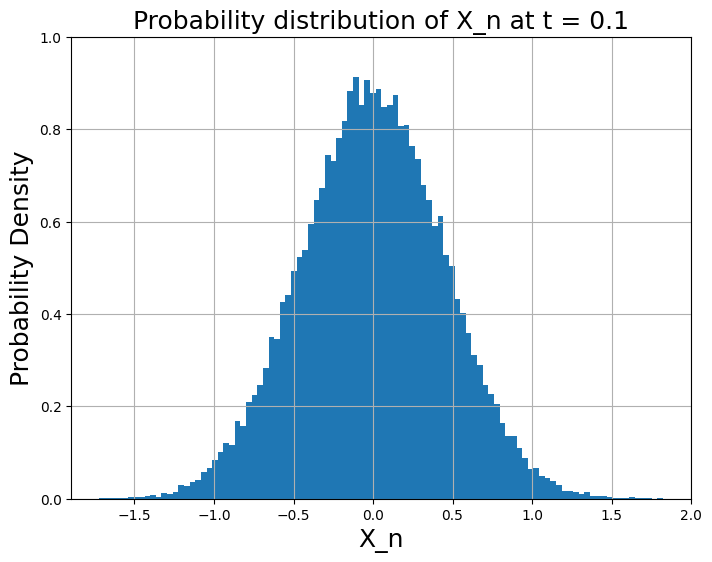

In [4]:
plt.figure(figsize=(8,6))
plt.grid(True)
plt.title('Probability distribution of X_n at t = 0.1', fontsize=18)
plt.xlabel('X_n', fontsize=18)
plt.ylabel('Probability Density', fontsize=18)
plt.ylim(ymax = 1)
plt.hist(X_norm_0_1, 100, density=True)
plt.show()

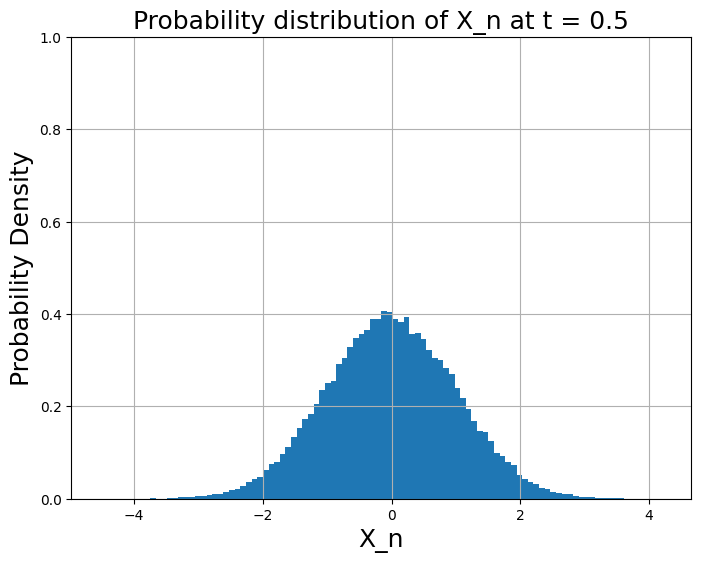

In [5]:
plt.figure(figsize=(8,6))
plt.grid(True)
plt.title('Probability distribution of X_n at t = 0.5', fontsize=18)
plt.xlabel('X_n', fontsize=18)
plt.ylabel('Probability Density', fontsize=18)
plt.ylim(ymax = 1)
plt.hist(X_norm_0_5, 100, density=True)
plt.show()

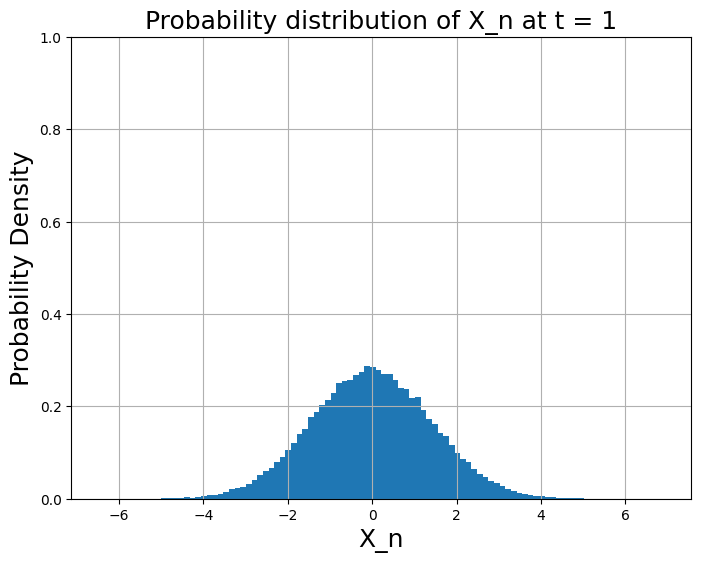

In [6]:
plt.figure(figsize=(8,6))
plt.grid(True)
plt.title('Probability distribution of X_n at t = 1', fontsize=18)
plt.xlabel('X_n', fontsize=18)
plt.ylabel('Probability Density', fontsize=18)
plt.ylim(ymax = 1)
plt.hist(X_norm, 100, density=True)
plt.show()

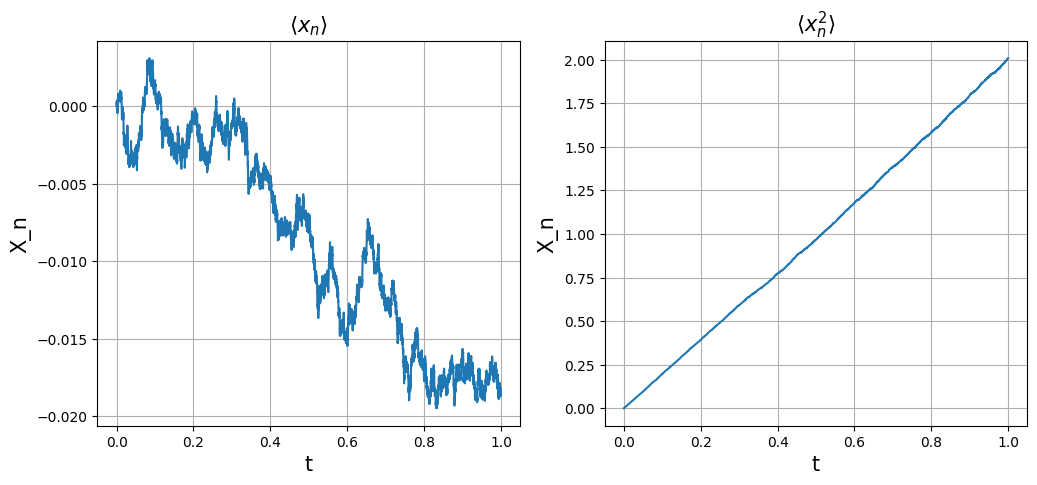

The fitted line is x=1.9957t+-0.0117
Therefore the estimated diffusivity is  0.9978735143598614 , while the theoretical value is  1


In [7]:
X_arr_2 = []

for i in range(10000):
    X = random_walk(N)
    X_arr_2.append(X)
    
n_mean = np.average(X_arr_2, axis=0)
n_var = np.average(np.square(X_arr_2), axis=0)
T = np.arange(0,N*h,step=h)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(T,n_mean)
plt.title(r"$\langle x_n \rangle$", fontsize=15)
plt.xlabel("t", fontsize=15)
plt.ylabel("X_n", fontsize=15)
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(T,n_var)
plt.title(r"$\langle x_n^2 \rangle$", fontsize=15)
plt.xlabel("t", fontsize=15)
plt.ylabel("X_n", fontsize=15)
plt.grid(True)
plt.show()

m,c = np.polyfit(T,n_var,1)
print("The fitted line is x={:.4f}t+{:.4f}".format(m,c))
print("Therefore the estimated diffusivity is ",m/2, ", while the theoretical value is ", D)